In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
import pandas as pd
from matplotlib import *
from plotnine import *

In [95]:
art = pd.read_csv("updated_combined_artists.csv")
art.head()

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,212600,70,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,4,Taylor Swift
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,231833,71,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,4,Taylor Swift
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,231000,73,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,4,Taylor Swift
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,235800,71,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,4,Taylor Swift
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,193289,70,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,4,Taylor Swift


In [96]:
# country
country = art[(art["artist"] == 'Luke Combs') | (art["artist"] == 'Morgan Wallace') | 
    (art["artist"] == 'Zach Bryan') | (art['album']== 'Fearless') | (art['album']== 'Speak Now')]

country.head()

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist
461,Mine,Speak Now,2010-10-25,230706,61,0.00265,0.624,0.757,0.000002,0.1890,-2.940,0.0296,121.070,4,Taylor Swift
462,Sparks Fly,Speak Now,2010-10-25,260933,60,0.03960,0.605,0.787,0.000001,0.1630,-3.002,0.0308,114.987,4,Taylor Swift
463,Back To December,Speak Now,2010-10-25,293026,64,0.11700,0.529,0.670,0.000000,0.3340,-4.663,0.0303,141.893,4,Taylor Swift
464,Speak Now,Speak Now,2010-10-25,240760,55,0.09500,0.709,0.599,0.000000,0.0973,-3.734,0.0304,118.975,4,Taylor Swift
465,Dear John,Speak Now,2010-10-25,403920,53,0.16600,0.589,0.470,0.000001,0.1120,-5.320,0.0280,119.386,3,Taylor Swift


In [97]:
def spot_features (feature):

    df = country.groupby('artist').agg({feature: 'mean'}).reset_index()

    plot = (ggplot(df, aes(x = 'artist', y= feature, fill = 'artist'))
    + geom_col()
    + geom_text(aes(label=feature), va='bottom', format_string='{:.3f}')
    + labs(
        x = 'artist',
        y = feature,
        title = feature
    ))
    
    return plot

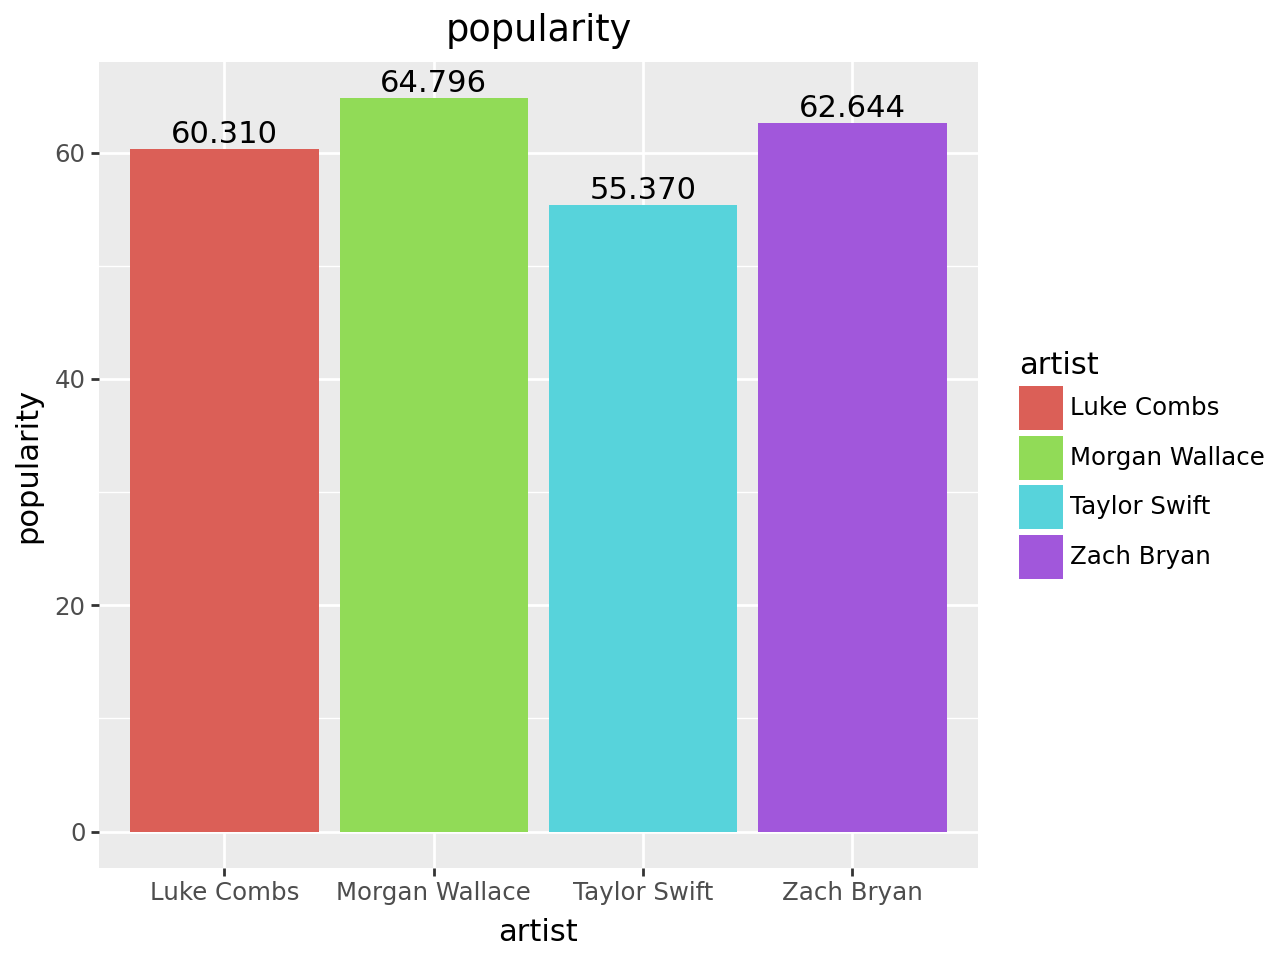

In [98]:
spot_features('popularity')

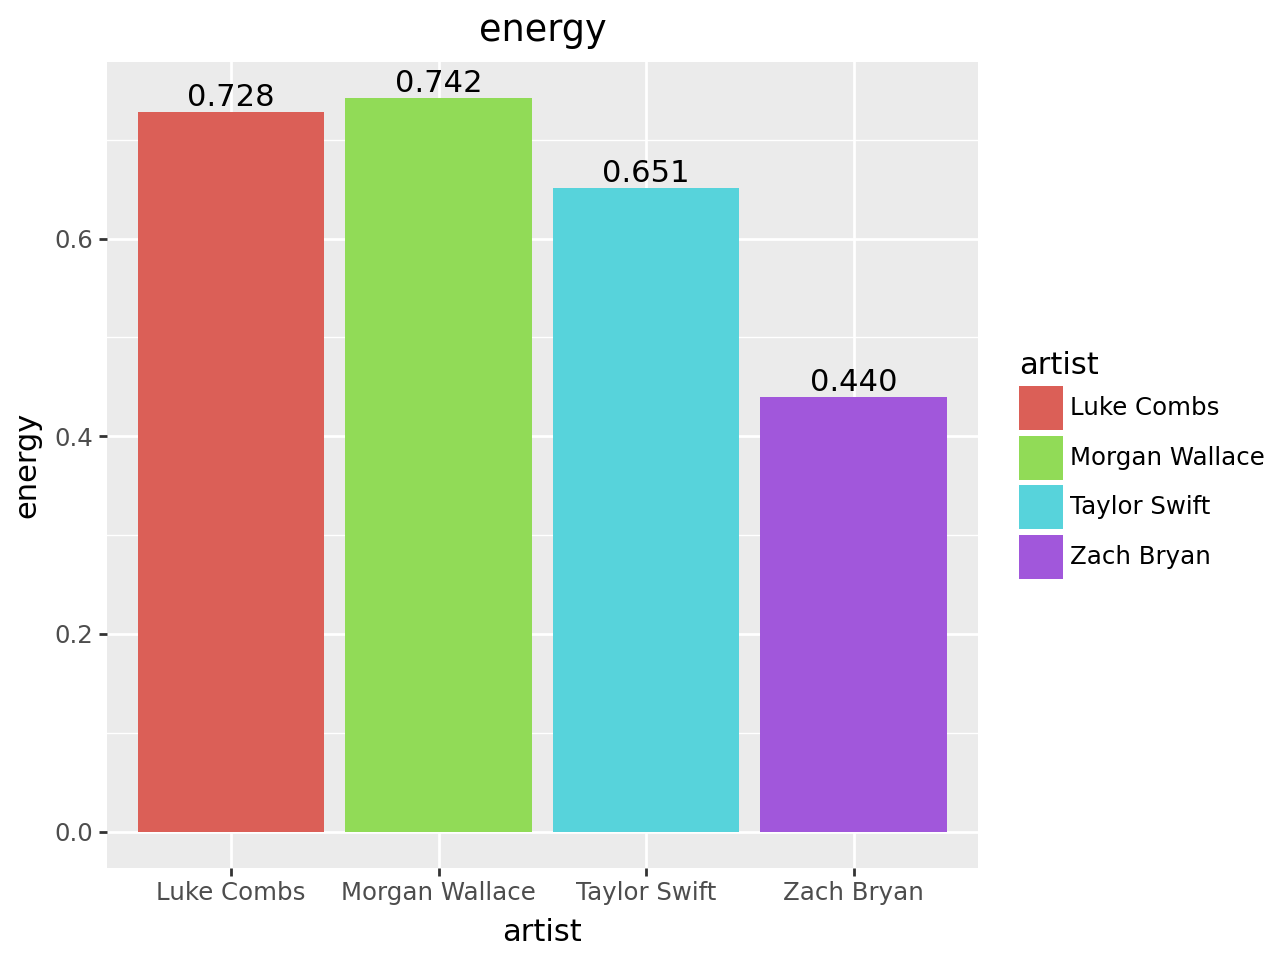

In [99]:
spot_features('energy')

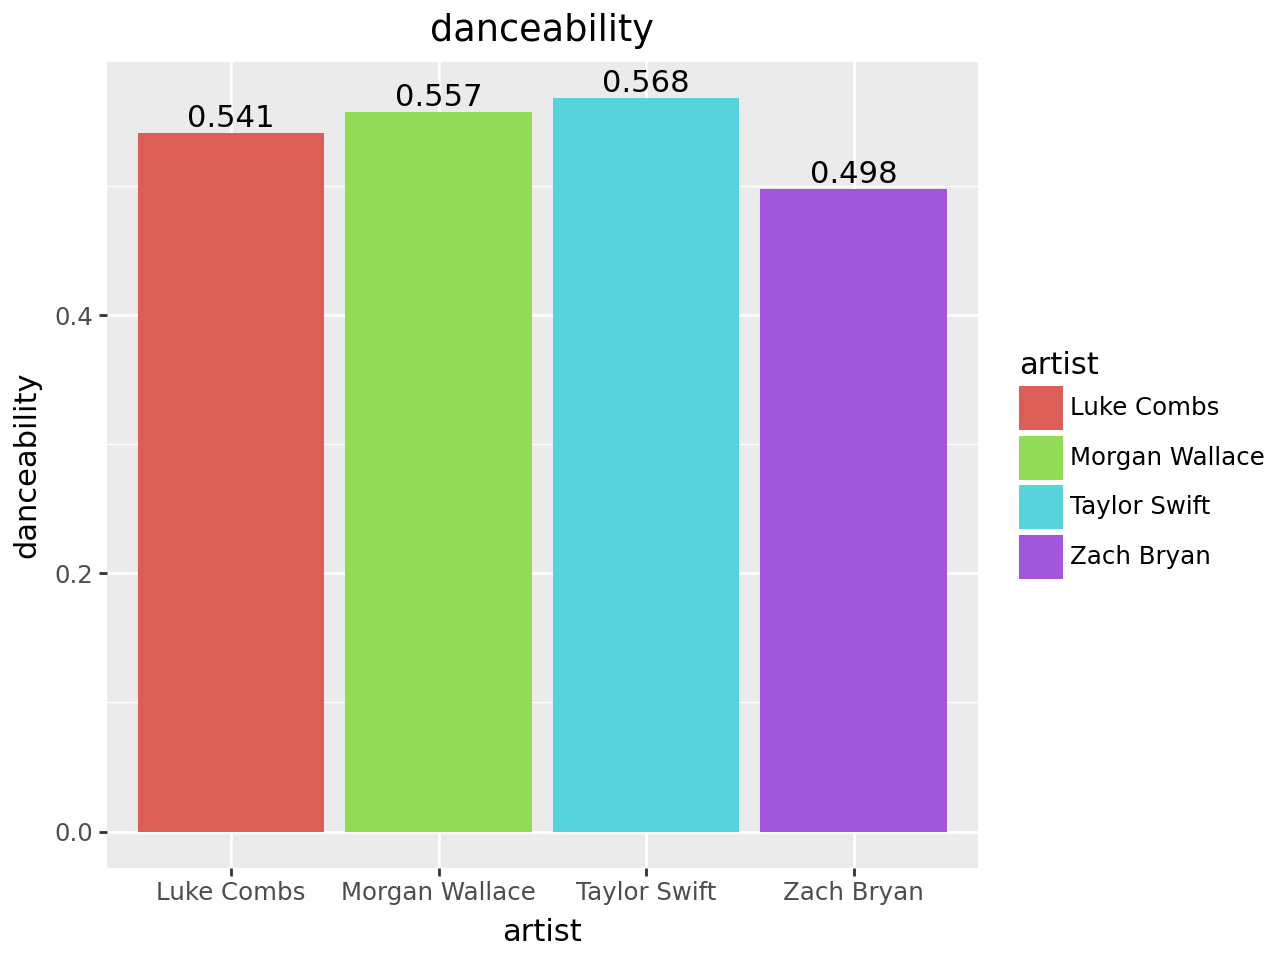

In [100]:
spot_features('danceability')

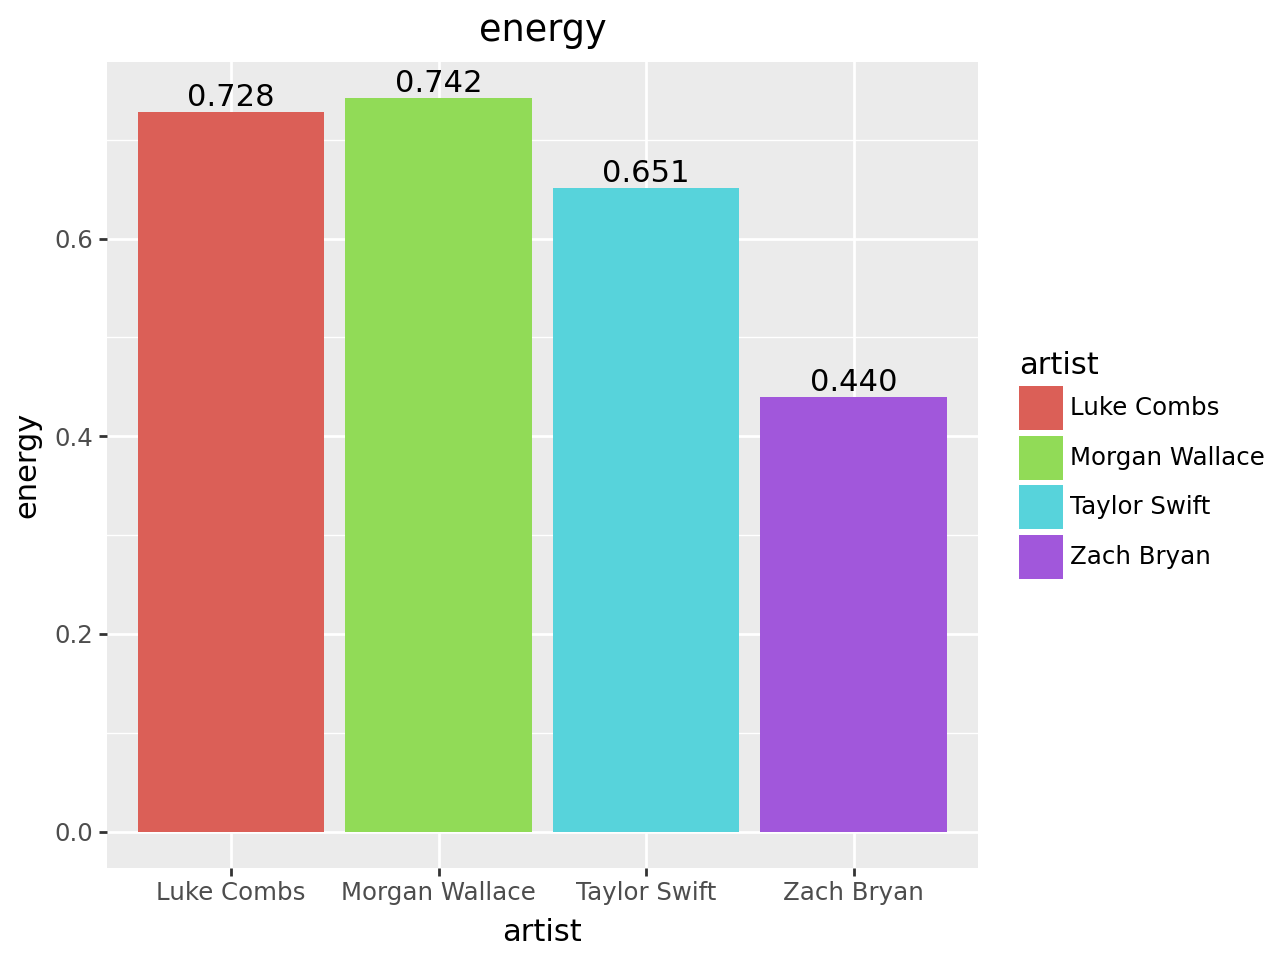

In [101]:
spot_features('energy')

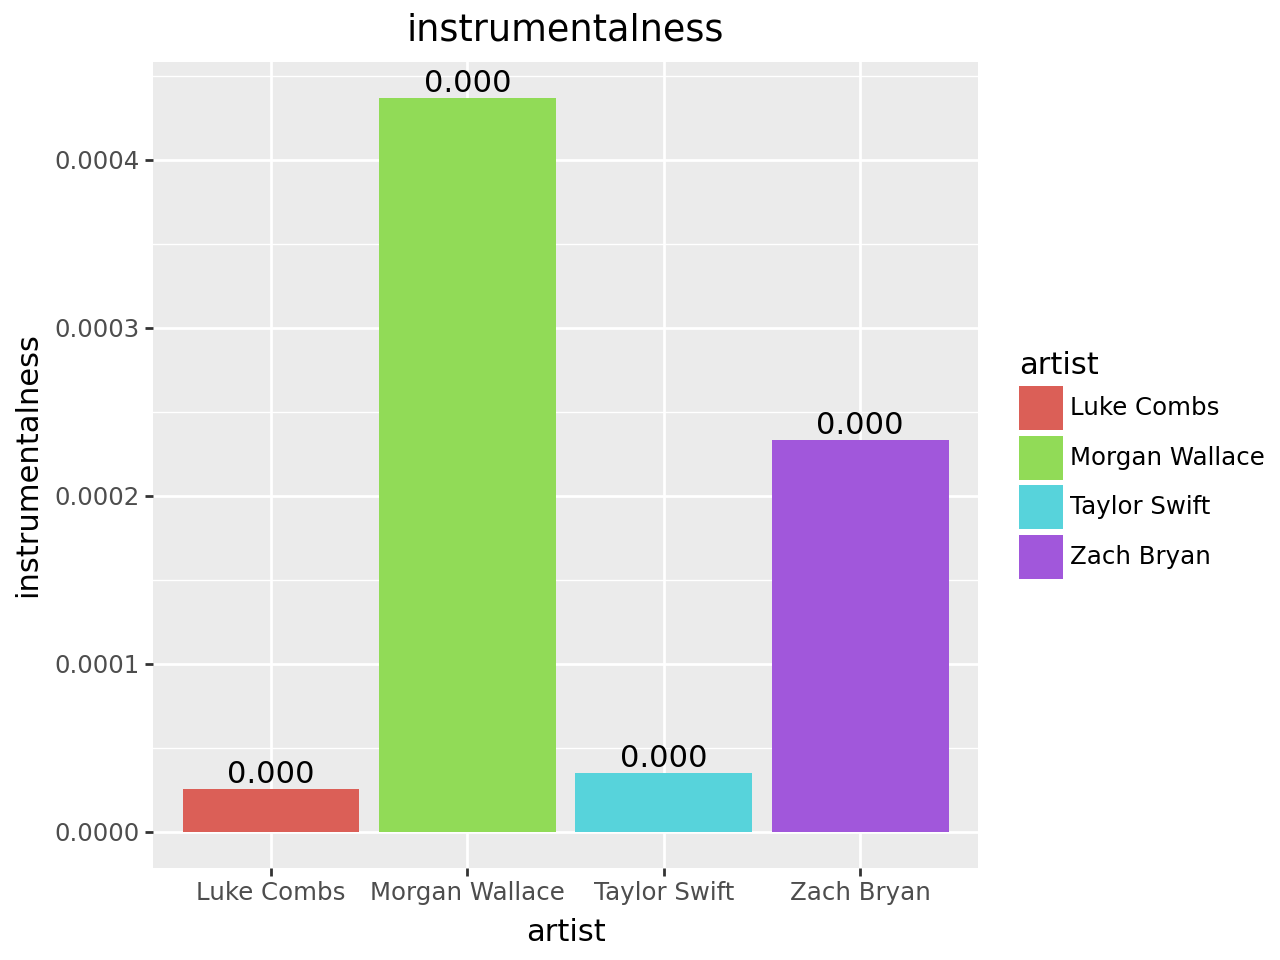

In [102]:
spot_features('instrumentalness')

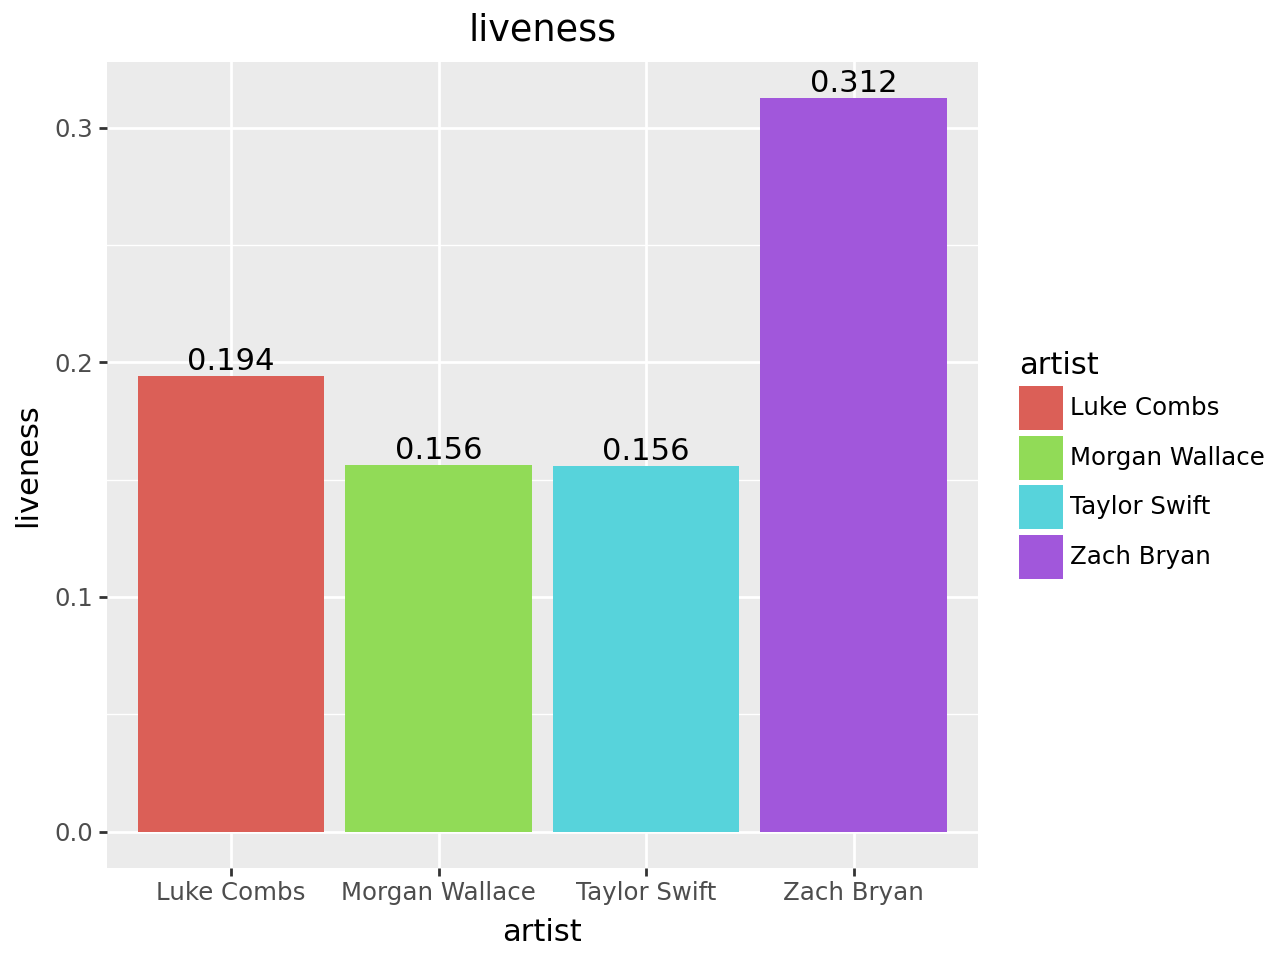

In [103]:
spot_features('liveness')

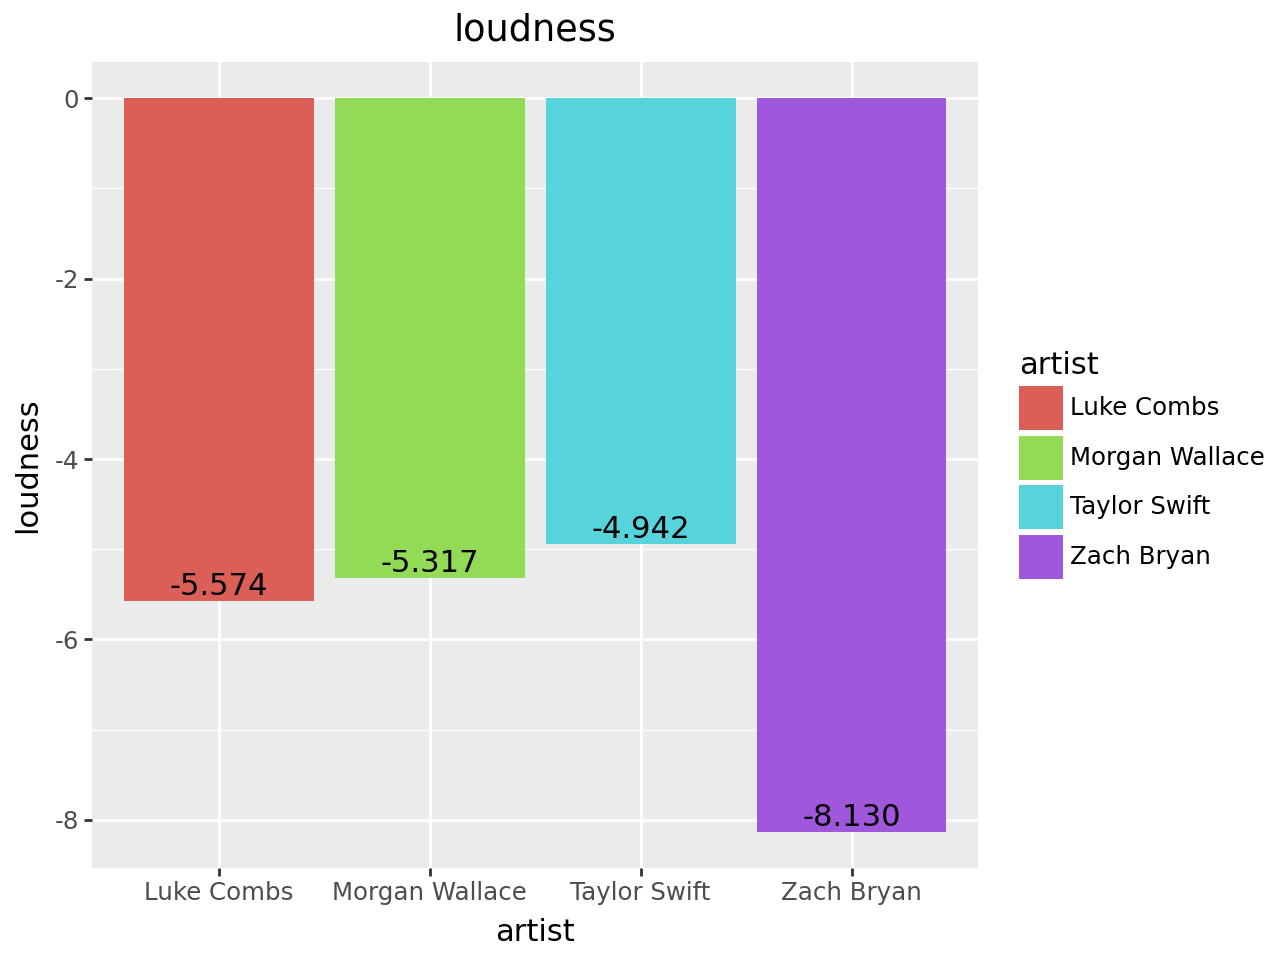

In [104]:
spot_features('loudness')

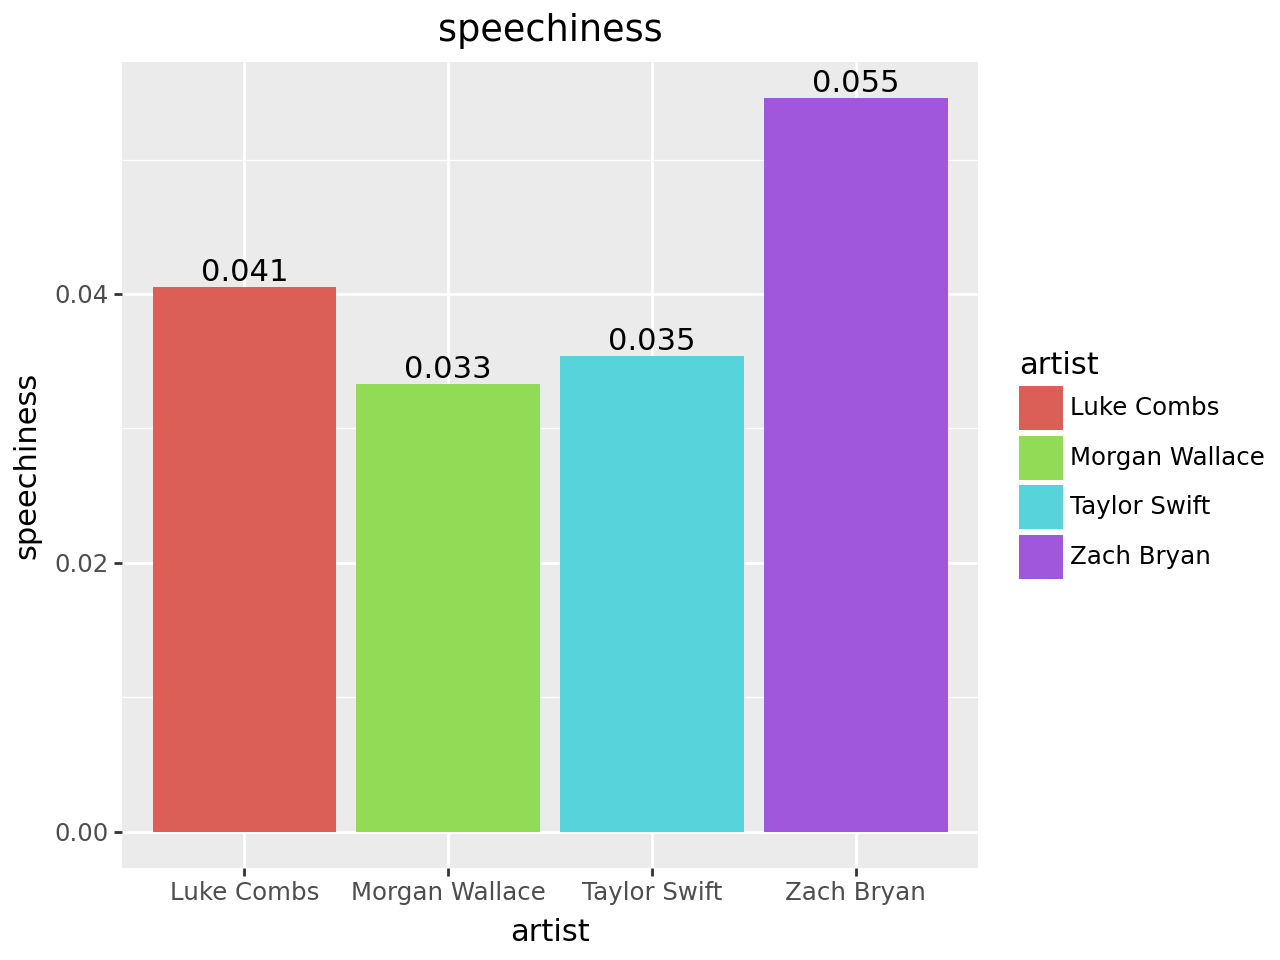

In [105]:
spot_features('speechiness')

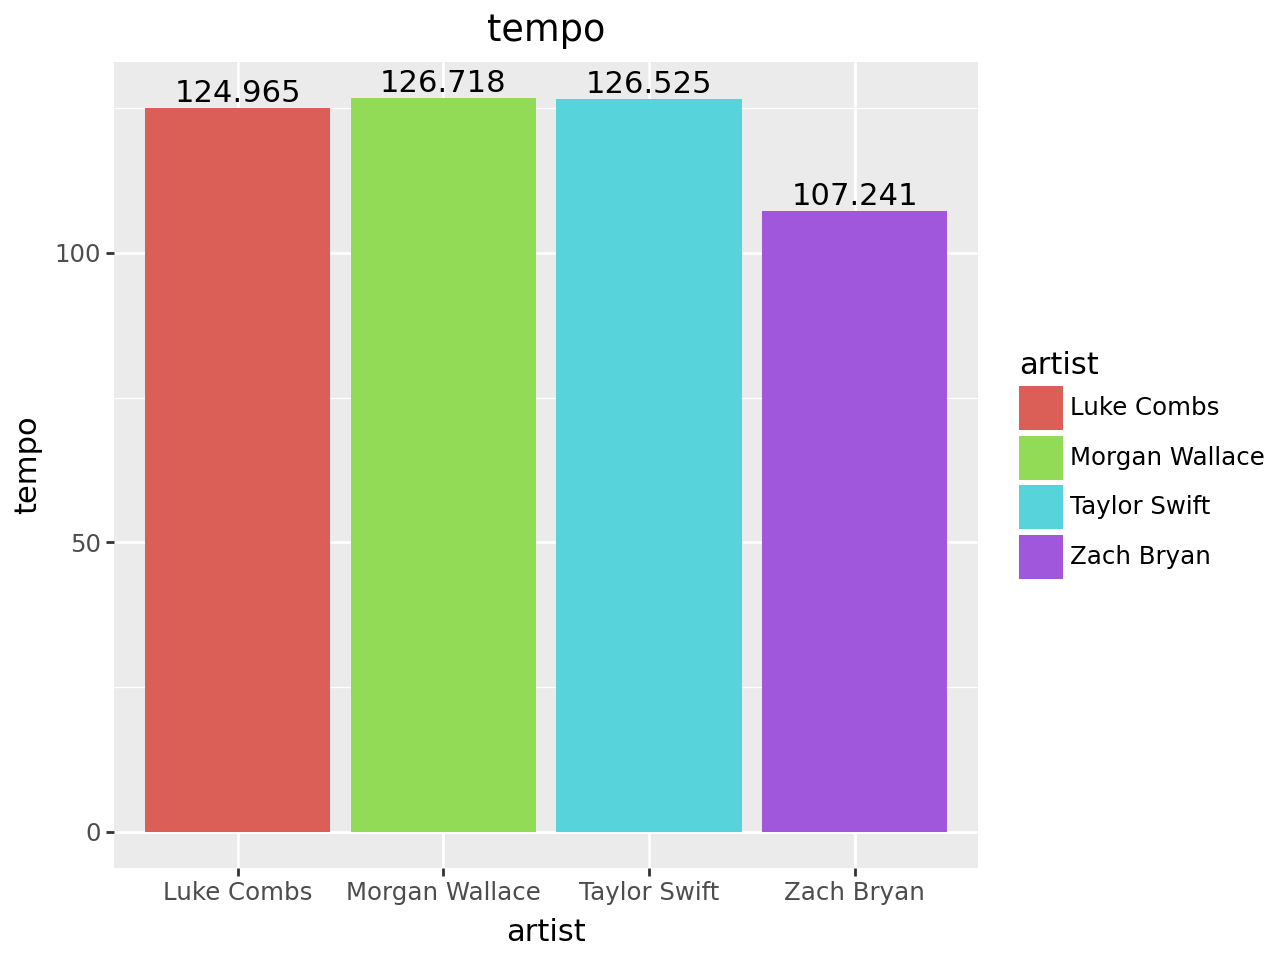

In [106]:
spot_features('tempo')

In [107]:
# Normalize the 'loudness' column to a 0-1 scale
country['loudness_norm'] = (country['loudness'] - country['loudness'].min()) / (country['loudness'].max() - country['loudness'].min())

# Calculate the score
# Adjust the weights as necessary
country['score'] = (2 * country['popularity'] +
                country['danceability'] +
                country['energy'] +
                country['loudness_norm'] +  # Now using the normalized loudness
                country['acousticness']) / 6  # Divided by the total weight (6 in this case)

# Group by artist and calculate the mean score for each artist
artist_scores = country.groupby('artist')['score'].mean().reset_index()

# Rank the artists by their score
artist_scores = artist_scores.sort_values(by='score', ascending=False).reset_index(drop=True)

# Display the ranked artists
artist_scores

,artist,score
0,Morgan Wallace,21.998149
1,Zach Bryan,21.236249
2,Luke Combs,20.470680
3,Taylor Swift,18.828777


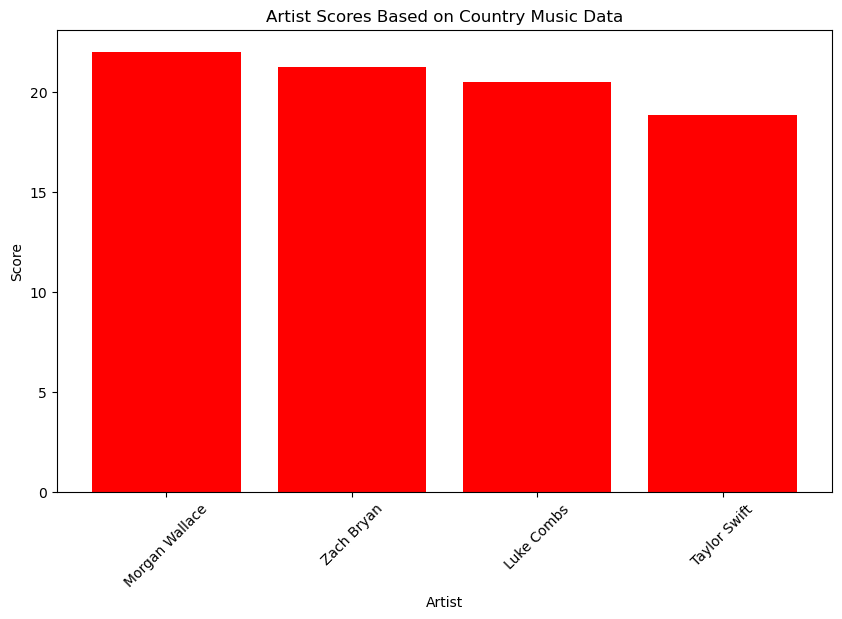

In [108]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(artist_scores['artist'], artist_scores['score'], color="red")
plt.xlabel('Artist')
plt.ylabel('Score')
plt.title('Artist Scores Based on Country Music Data')
plt.xticks(rotation=45)
plt.show()

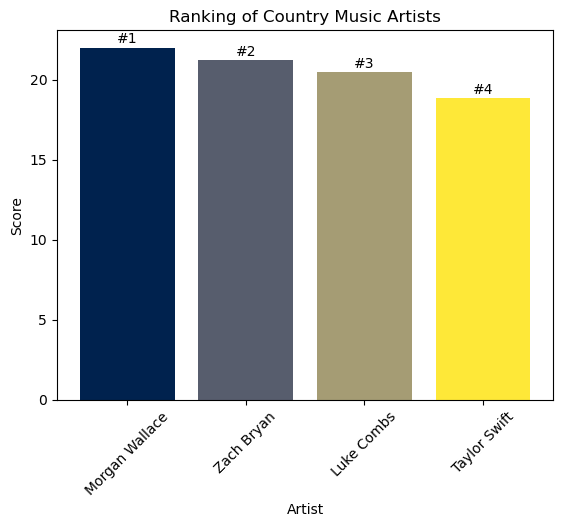

In [109]:
import numpy as np

colors = plt.cm.cividis(np.linspace(0, 1, len(artist_scores)))

# Plot each bar individually to assign different colors
for i, (artist, score) in enumerate(artist_scores.itertuples(index=False)):
    plt.bar(artist, score, color=colors[i])

# Adding rankings
# The rankings are based on the score, so we use the index + 1 since our DataFrame is already sorted
for index, value in enumerate(artist_scores['score']):
    plt.text(index, value + 0.1, # Adjust positioning as needed
             f'#{index + 1}', 
             ha='center', 
             va='bottom')

plt.xlabel('Artist')
plt.ylabel('Score')
plt.title('Ranking of Country Music Artists')
plt.xticks(rotation=45)
plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler

pop2 = country.copy()
# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the column
pop2['popularity'] = scaler.fit_transform(pop2[['popularity']])
pop2['acousticness'] = scaler.fit_transform(pop2[['acousticness']])
pop2['danceability'] = scaler.fit_transform(pop2[['danceability']])
pop2['energy'] = scaler.fit_transform(pop2[['energy']])
pop2['loudness'] = scaler.fit_transform(pop2[['loudness']])
pop2['liveness'] = scaler.fit_transform(pop2[['liveness']])
pop2['instrumentalness'] = scaler.fit_transform(pop2[['instrumentalness']])
pop2['speechiness'] = scaler.fit_transform(pop2[['speechiness']])
pop2['tempo'] = scaler.fit_transform(pop2[['tempo']])
pop2

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist,loudness_norm,score
461,Mine,Speak Now,2010-10-25,230706,-0.096128,-1.110205,0.968877,0.505907,-0.166317,-0.128636,1.253455,-0.450668,0.024577,4,Taylor Swift,0.968129,20.725297
462,Sparks Fly,Speak Now,2010-10-25,260933,-0.183379,-0.984632,0.761067,0.635074,-0.166653,-0.259937,1.229708,-0.407019,-0.170814,4,Taylor Swift,0.963852,20.399242
463,Back To December,Speak Now,2010-10-25,293026,0.165625,-0.721591,-0.070171,0.131323,-0.167717,0.603619,0.593529,-0.425206,0.693431,4,Taylor Swift,0.849269,21.694211
464,Speak Now,Speak Now,2010-10-25,240760,-0.619634,-0.796357,1.898551,-0.174372,-0.167717,-0.591725,0.949345,-0.421568,-0.042716,4,Taylor Swift,0.913355,18.719393
465,Dear John,Speak Now,2010-10-25,403920,-0.794136,-0.555066,0.586070,-0.729789,-0.166631,-0.517489,0.341891,-0.508866,-0.029514,3,Taylor Swift,0.803946,18.004824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,Snow,DeAnn,2019-08-24,178573,1.038135,1.619951,0.236075,-2.436514,-0.167717,-0.583140,-3.649457,0.538705,1.123884,4,Zach Bryan,0.085058,24.920276
1127,Man Thats Never Known You,DeAnn,2019-08-24,185514,-0.183379,1.959797,1.439183,-2.495931,-0.167717,-0.573040,-3.357220,0.254988,-1.337285,4,Zach Bryan,0.137693,20.295082
1128,Moon in Oklahoma,DeAnn,2019-08-24,179761,-0.357881,1.881633,1.417308,-2.403792,-0.166197,-0.657375,-3.541448,0.102217,-1.311235,4,Zach Bryan,0.104512,19.622285
1129,Condemned,DeAnn,2019-08-24,174673,1.648892,1.704913,0.881378,-2.107569,-0.167717,-0.057936,-2.797642,2.801169,0.197773,4,Zach Bryan,0.238480,27.305913


In [111]:
# Calculate the score
# Adjust the weights as necessary
pop2['score'] = (2 * pop2['popularity'] + 
pop2['acousticness'] +
pop2['danceability'] +
pop2['energy'] +
pop2['loudness'] +
pop2['liveness'] +
pop2['instrumentalness'] +
pop2['speechiness'] +
pop2['tempo'])/ 9   # Divided by the total weight (6 in this case)

# Group by artist and calculate the mean score for each artist
artist_scores = pop2.groupby('artist')['score'].mean().reset_index()

# Rank the artists by their score
artist_scores = artist_scores.sort_values(by='score', ascending=False).reset_index(drop=True)

# Display the ranked artists
print(artist_scores)

           artist     score
0  Morgan Wallace  0.124940
1      Luke Combs -0.043593
2      Zach Bryan -0.057495
3    Taylor Swift -0.139977


In [112]:
# had to lower to 71 to get TSwift's most popular country song
# The song being You Belong With Me from Fearless album
filtered_df = country[country['popularity'] >= 71]
filtered_df.head()
#filtered_df['artist'].unique()

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist,loudness_norm,score
499,You Belong With Me,Fearless,2008-11-11,231133,71,0.1620,0.687,0.783,0.000013,0.114,-4.440,0.0386,129.964,4,Taylor Swift,0.864652,24.082775
824,Where the Wild Things Are,Gettin' Old,2023-03-24,239533,84,0.0189,0.708,0.731,0.000004,0.129,-4.872,0.0345,116.975,4,Luke Combs,0.834851,28.382125
825,Love You Anyway,Gettin' Old,2023-03-24,229626,77,0.1490,0.532,0.489,0.000000,0.237,-7.419,0.0311,139.807,4,Luke Combs,0.659147,25.971525
827,Fast Car,Gettin' Old,2023-03-24,265493,90,0.1860,0.712,0.603,0.000000,0.115,-5.520,0.0262,97.994,4,Luke Combs,0.790149,30.381858
829,5 Leaf Clover,Gettin' Old,2023-03-24,211053,73,0.0554,0.423,0.580,0.000003,0.168,-4.959,0.0243,82.755,3,Luke Combs,0.828849,24.647875


In [113]:
# Filter the DataFrame for Taylor Swift
taylor_swift_df = country[country['artist'] == 'Morgan Wallace']

# Sort by popularity in descending order and select the top row
most_popular_taylor_swift = taylor_swift_df.sort_values(by='popularity', ascending=False).head(1)

most_popular_taylor_swift

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist,loudness_norm,score
938,Thinkin’ Bout Me,One Thing At A Time,2023-03-03,177387,88,0.492,0.656,0.757,0.0,0.117,-5.775,0.0308,139.971,4,Morgan Wallace,0.772558,29.779593


In [114]:
# Now, experimenting with pop

In [115]:
pop = art[(art["artist"] == 'Olivia Rodrigo') | (art["artist"] == 'Doja Cat') | 
    (art["artist"] == 'Miley Cyrus') | (art['album']== '1989') | 
          (art['album']== 'Lover') | (art['album']== 'Reputation') | (art['album']== 'Folklore')
         | (art['album']== "Red (Taylor's Version)") | (art['album']== 'Midnights') ]

pop.head()

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist
108,Lavender Haze,Midnights,2022-10-21,202395,84,0.2580,0.733,0.436,0.000573,0.157,-10.489,0.0800,96.985,4,Taylor Swift
109,Maroon,Midnights,2022-10-21,218270,79,0.0573,0.637,0.398,0.000001,0.101,-8.294,0.0564,108.075,4,Taylor Swift
110,Anti-Hero,Midnights,2022-10-21,200690,93,0.1300,0.637,0.643,0.000002,0.142,-6.571,0.0519,97.008,4,Taylor Swift
111,Snow On The Beach (feat. Lana Del Rey),Midnights,2022-10-21,256124,77,0.6900,0.663,0.319,0.000993,0.117,-13.481,0.0375,109.957,4,Taylor Swift
112,"You're On Your Own, Kid",Midnights,2022-10-21,194206,85,0.4010,0.696,0.396,0.000005,0.125,-10.289,0.0656,120.041,4,Taylor Swift


In [116]:
swift_songs = pop[pop['artist'] == 'Taylor Swift']
other_artists_songs = pop[~(pop['artist'] == 'Taylor Swift')]

In [117]:
swift_stats = swift_songs.describe()
other_artists_stats = other_artists_songs.describe()

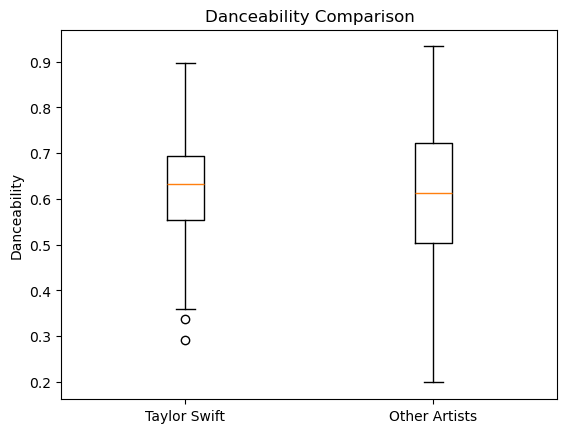

In [118]:
# Boxplot for danceability comparison
data_to_plot = [swift_songs['danceability'], other_artists_songs['danceability']]
plt.boxplot(data_to_plot, labels=['Taylor Swift', 'Other Artists'])
plt.ylabel('Danceability')
plt.title('Danceability Comparison')
plt.show()

In [119]:
from scipy import stats
stat, p_value = stats.mannwhitneyu(swift_songs['danceability'], other_artists_songs['danceability'])
print(f'Statistic: {stat}, P-value: {p_value}')

Statistic: 10954.0, P-value: 0.5742169384819631


In [120]:
# comparing T to other 3

In [121]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

def compare_song_features_individual_artists(df, feature_list):
    """
    Compares song features between Taylor Swift's songs and songs by Olivia Rodrigo, Doja Cat, and Miley Cyrus individually.

    Parameters:
    - df: DataFrame containing the songs data.
    - feature_list: List of features to compare (e.g., popularity, acousticness, etc.).
    """
    swift_songs = df[df['artist'] == 'Taylor Swift']
    other_artists = ['Olivia Rodrigo', 'Doja Cat', 'Miley Cyrus']

    for feature in feature_list:
        plt.figure(figsize=(10, 6))
        
        # Data for Taylor Swift
        data_to_plot = [swift_songs[feature].dropna()]
        labels = ['Taylor Swift']
        
        # Collect data for each other artist and add to the plotting data
        for artist in other_artists:
            artist_songs = df[df['artist'] == artist]
            data_to_plot.append(artist_songs[feature].dropna())
            labels.append(artist)
        
        # Creating boxplot
        plt.boxplot(data_to_plot, labels=labels)
        plt.title(f'Comparison of {feature} Across Artists')
        plt.ylabel(feature)
        plt.xticks(rotation=45)
        plt.show()
        
        # Performing Mann-Whitney U test between Taylor Swift and each other artist for the feature
        for artist in other_artists:
            artist_songs = df[df['artist'] == artist]
            stat, p = mannwhitneyu(swift_songs[feature].dropna(), artist_songs[feature].dropna(), alternative='two-sided')
            print(f'{feature} comparison between Taylor Swift and {artist}: U={stat}, p-value={p}')


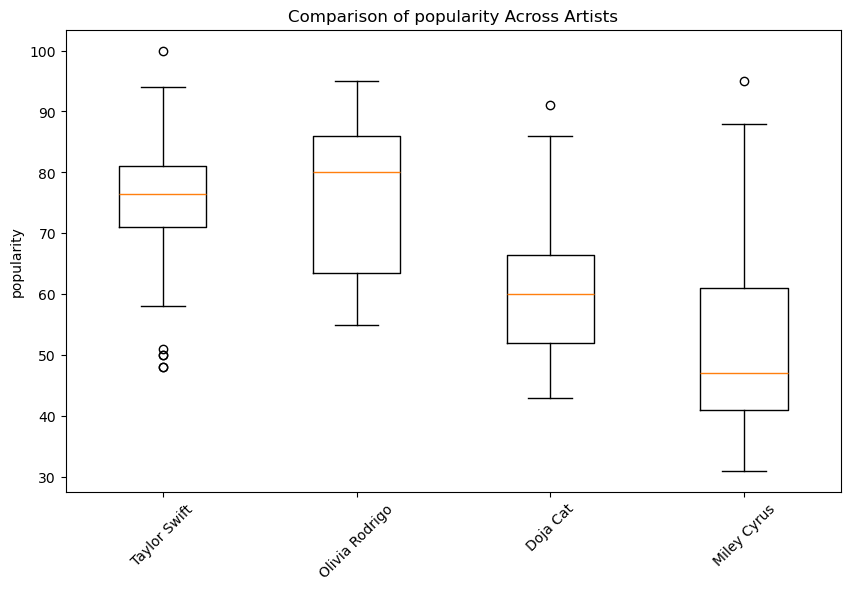

popularity comparison between Taylor Swift and Olivia Rodrigo: U=1355.0, p-value=0.45946201795123
popularity comparison between Taylor Swift and Doja Cat: U=5561.5, p-value=6.421684879605467e-13
popularity comparison between Taylor Swift and Miley Cyrus: U=10300.0, p-value=1.4704048340888385e-23


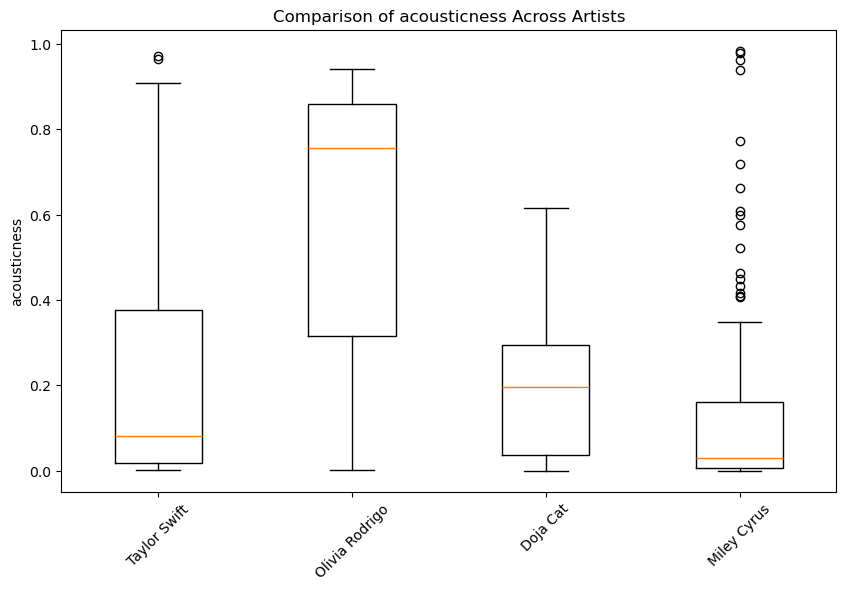

acousticness comparison between Taylor Swift and Olivia Rodrigo: U=708.0, p-value=4.633005615388779e-06
acousticness comparison between Taylor Swift and Doja Cat: U=3127.5, p-value=0.43357592726775485
acousticness comparison between Taylor Swift and Miley Cyrus: U=7179.0, p-value=0.001068502051267484


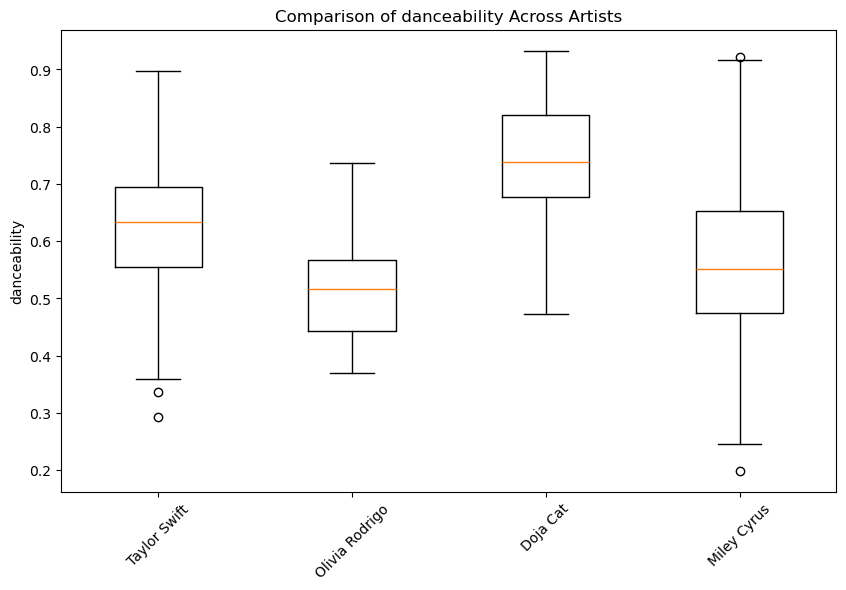

danceability comparison between Taylor Swift and Olivia Rodrigo: U=2242.5, p-value=6.054234170280394e-06
danceability comparison between Taylor Swift and Doja Cat: U=1504.0, p-value=1.0430121863223899e-09
danceability comparison between Taylor Swift and Miley Cyrus: U=7207.5, p-value=0.0008581562988691441


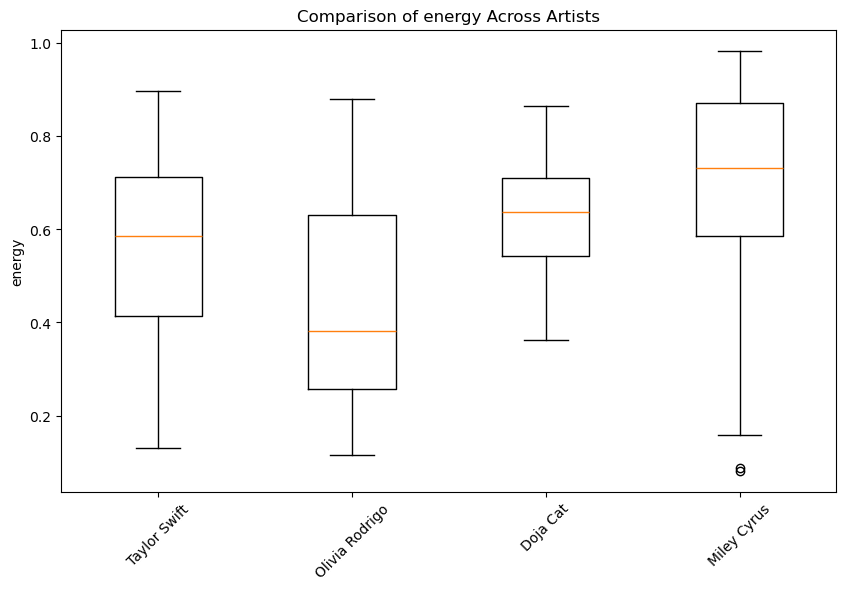

energy comparison between Taylor Swift and Olivia Rodrigo: U=1987.5, p-value=0.0026100438496704493
energy comparison between Taylor Swift and Doja Cat: U=2752.0, p-value=0.04406904770029703
energy comparison between Taylor Swift and Miley Cyrus: U=3208.5, p-value=1.245243040037857e-07


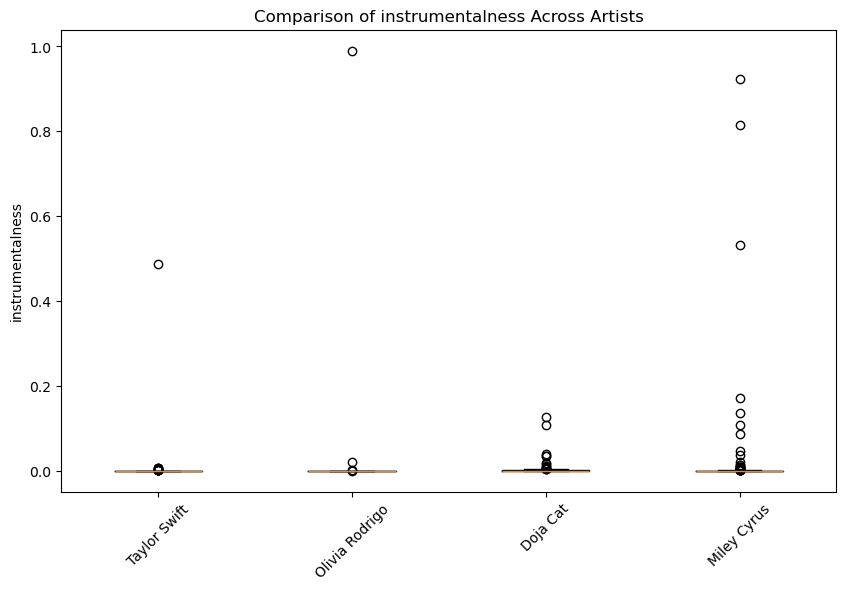

instrumentalness comparison between Taylor Swift and Olivia Rodrigo: U=1800.5, p-value=0.044459084448444326
instrumentalness comparison between Taylor Swift and Doja Cat: U=2641.0, p-value=0.015198035292458598
instrumentalness comparison between Taylor Swift and Miley Cyrus: U=5387.0, p-value=0.5401683721504309


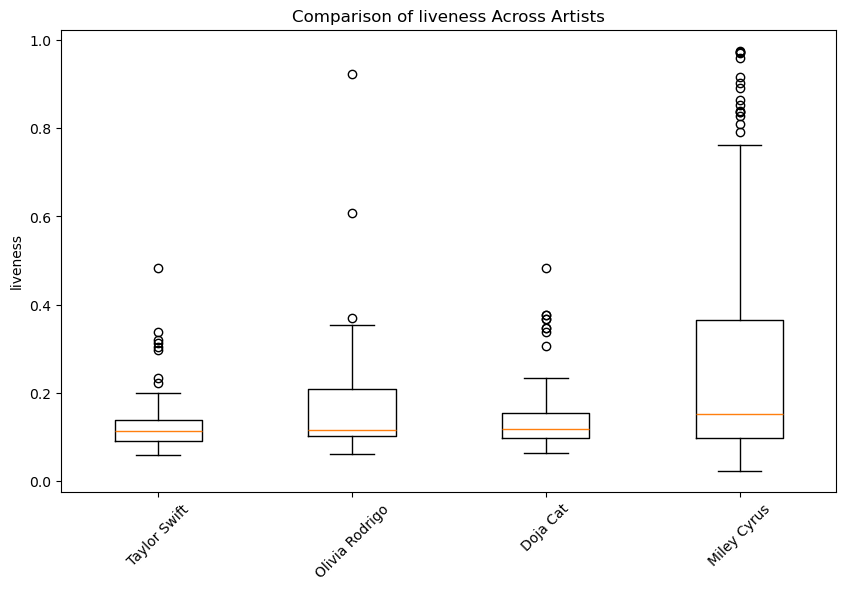

liveness comparison between Taylor Swift and Olivia Rodrigo: U=1301.0, p-value=0.2891793966096414
liveness comparison between Taylor Swift and Doja Cat: U=3083.0, p-value=0.35291285083232504
liveness comparison between Taylor Swift and Miley Cyrus: U=3895.5, p-value=0.0001414903391709317


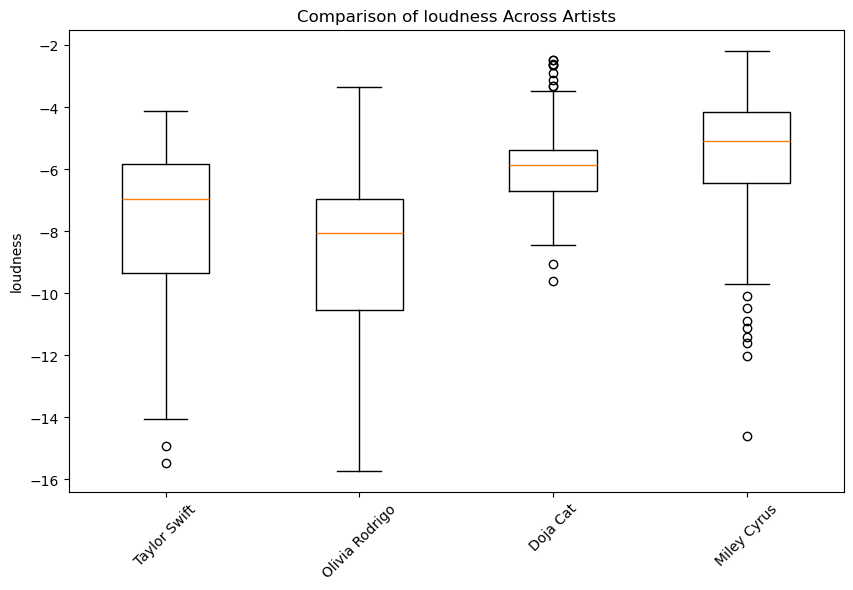

loudness comparison between Taylor Swift and Olivia Rodrigo: U=1788.0, p-value=0.06788814451076342
loudness comparison between Taylor Swift and Doja Cat: U=1902.0, p-value=1.5993122773479713e-06
loudness comparison between Taylor Swift and Miley Cyrus: U=2475.0, p-value=6.5042086355418125e-12


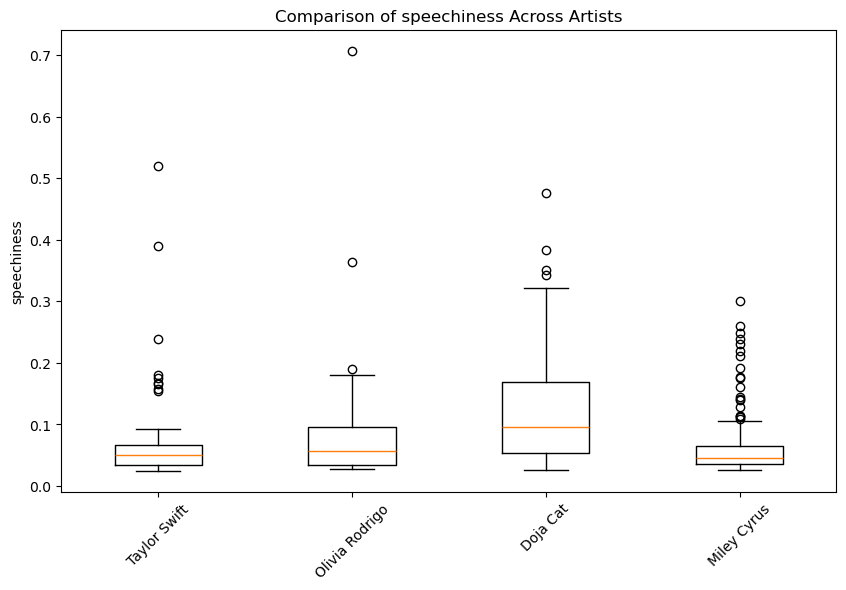

speechiness comparison between Taylor Swift and Olivia Rodrigo: U=1309.5, p-value=0.3127878074464313
speechiness comparison between Taylor Swift and Doja Cat: U=1767.0, p-value=1.5990291443373937e-07
speechiness comparison between Taylor Swift and Miley Cyrus: U=5550.5, p-value=0.81252438396727


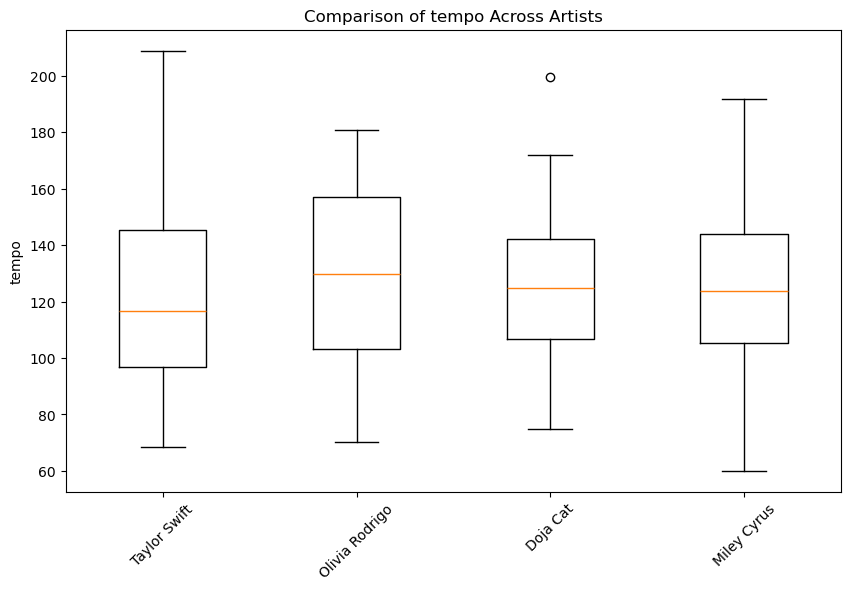

tempo comparison between Taylor Swift and Olivia Rodrigo: U=1294.0, p-value=0.27072749449631817
tempo comparison between Taylor Swift and Doja Cat: U=3063.0, p-value=0.3200234057466468
tempo comparison between Taylor Swift and Miley Cyrus: U=5119.5, p-value=0.24344004618566317


In [122]:
# List of features to compare
features_to_compare = ['popularity', 'acousticness', 'danceability', 'energy', 
                       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

compare_song_features_individual_artists(pop, features_to_compare)

In [ ]:
# cool, now for country

In [123]:
def compare_song_features_individual_artists(df, feature_list):
    """
    Compares song features between Taylor Swift's songs and songs by country artists individually.

    Parameters:
    - df: DataFrame containing the songs data.
    - feature_list: List of features to compare (e.g., popularity, acousticness, etc.).
    """
    swift_songs = df[df['artist'] == 'Taylor Swift']
    other_artists = ['Morgan Wallace', 'Zach Bryan', 'Luke Combs']

    for feature in feature_list:
        plt.figure(figsize=(10, 6))
        
        # Data for Taylor Swift
        data_to_plot = [swift_songs[feature].dropna()]
        labels = ['Taylor Swift']
        
        # Collect data for each other artist and add to the plotting data
        for artist in other_artists:
            artist_songs = df[df['artist'] == artist]
            data_to_plot.append(artist_songs[feature].dropna())
            labels.append(artist)
        
        # Creating boxplot
        plt.boxplot(data_to_plot, labels=labels)
        plt.title(f'Comparison of {feature} Across Artists')
        plt.ylabel(feature)
        plt.xticks(rotation=45)
        plt.show()
        
        # Performing Mann-Whitney U test between Taylor Swift and each other artist for the feature
        for artist in other_artists:
            artist_songs = df[df['artist'] == artist]
            stat, p = mannwhitneyu(swift_songs[feature].dropna(), artist_songs[feature].dropna(), alternative='two-sided')
            print(f'{feature} comparison between Taylor Swift and {artist}: U={stat}, p-value={p}')


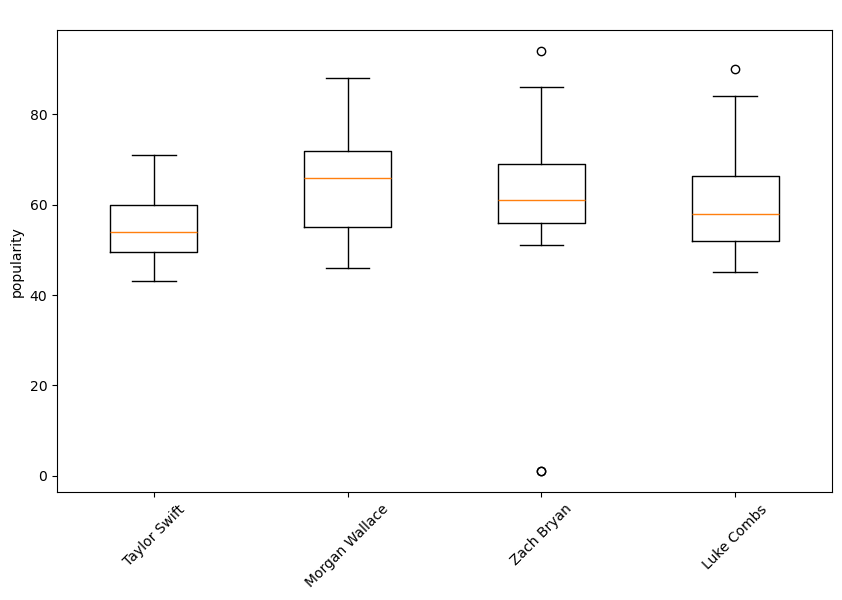

popularity comparison between Taylor Swift and Morgan Wallace: U=780.0, p-value=8.228240375129396e-05
popularity comparison between Taylor Swift and Zach Bryan: U=722.0, p-value=0.00010399778155088174
popularity comparison between Taylor Swift and Luke Combs: U=1008.5, p-value=0.04431453992649677


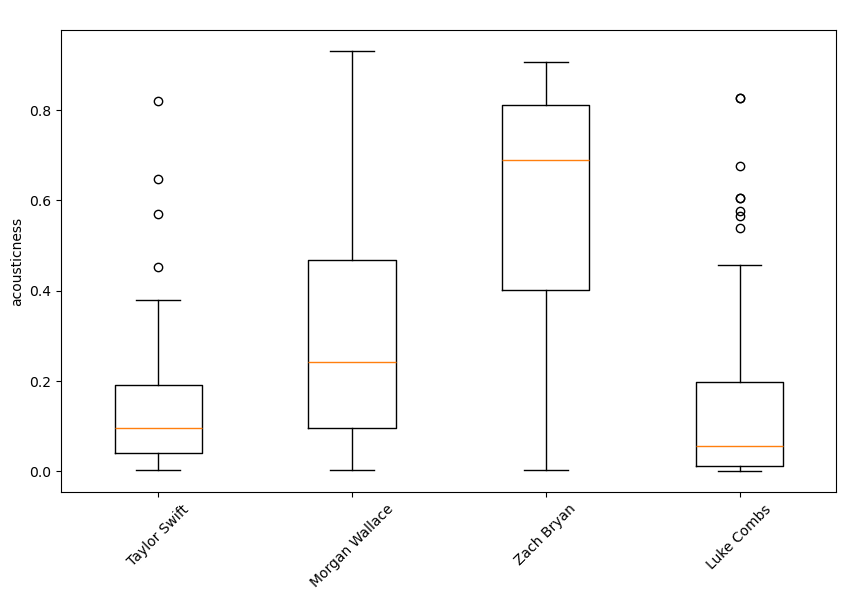

acousticness comparison between Taylor Swift and Morgan Wallace: U=1040.5, p-value=0.010497106738133718
acousticness comparison between Taylor Swift and Zach Bryan: U=443.0, p-value=4.6229363389078724e-08
acousticness comparison between Taylor Swift and Luke Combs: U=1594.0, p-value=0.15131064366754612


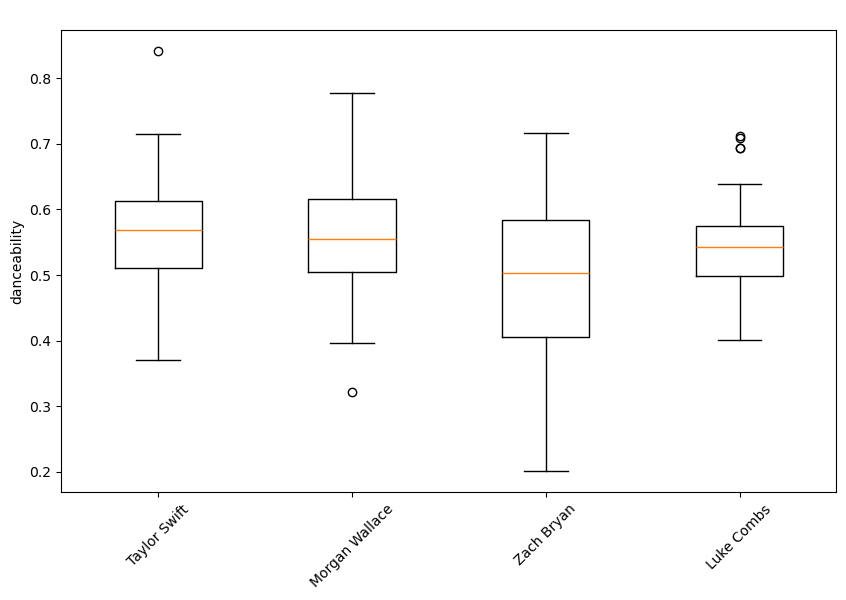

danceability comparison between Taylor Swift and Morgan Wallace: U=1592.0, p-value=0.7273837473935139
danceability comparison between Taylor Swift and Zach Bryan: U=1880.5, p-value=0.006759544081310501
danceability comparison between Taylor Swift and Luke Combs: U=1597.0, p-value=0.1463170326889313


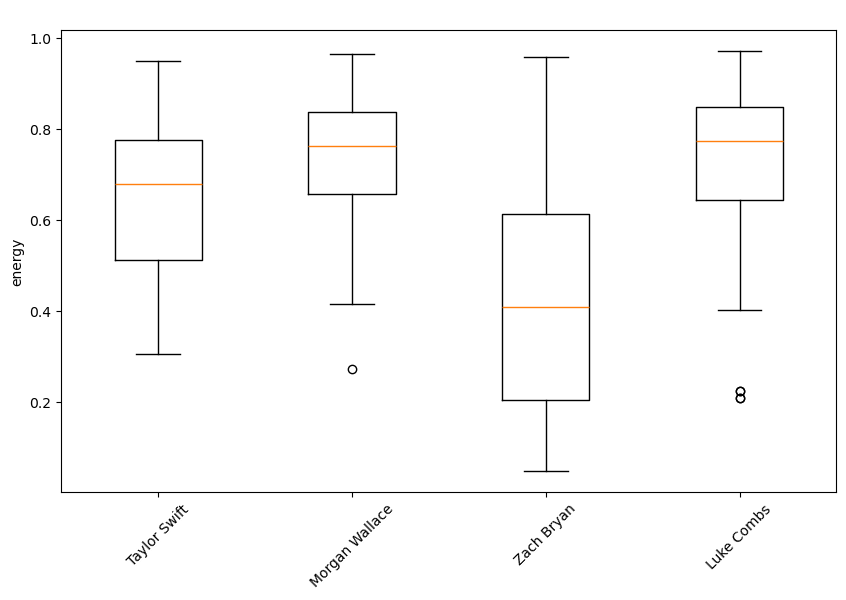

energy comparison between Taylor Swift and Morgan Wallace: U=1063.5, p-value=0.01478532072746308
energy comparison between Taylor Swift and Zach Bryan: U=2093.5, p-value=8.841256227237001e-05
energy comparison between Taylor Swift and Luke Combs: U=959.5, p-value=0.021545925078679966


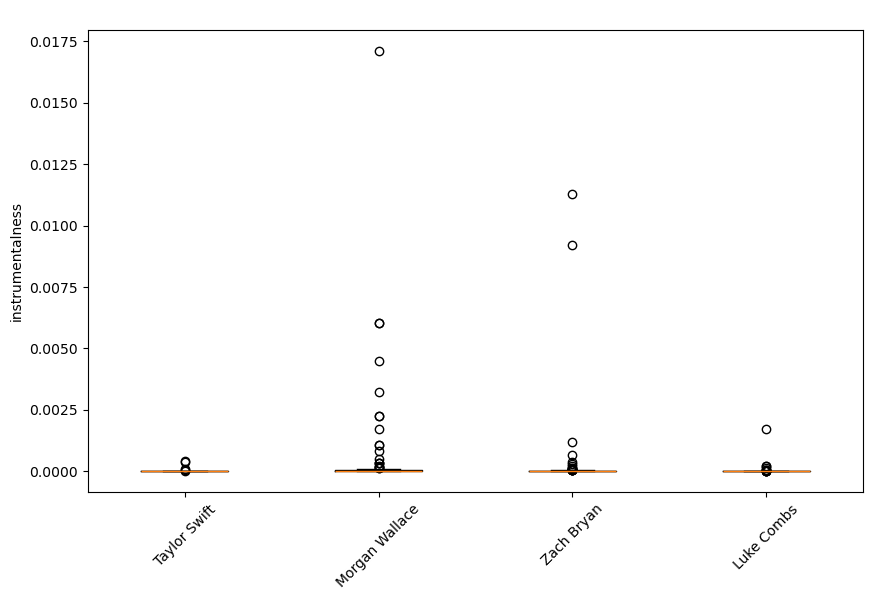

instrumentalness comparison between Taylor Swift and Morgan Wallace: U=1374.5, p-value=0.395461390675492
instrumentalness comparison between Taylor Swift and Zach Bryan: U=1358.5, p-value=0.7832344285806982
instrumentalness comparison between Taylor Swift and Luke Combs: U=1547.5, p-value=0.18539157337829748


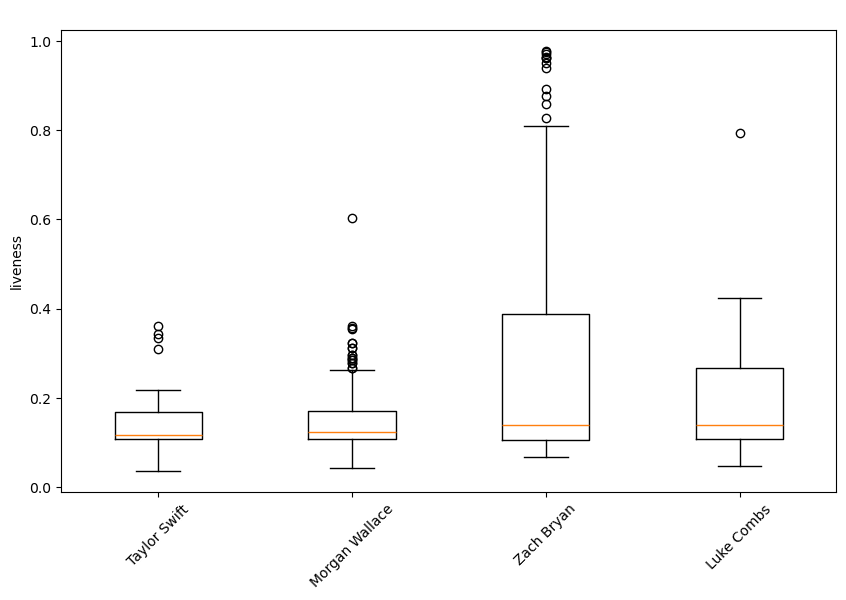

liveness comparison between Taylor Swift and Morgan Wallace: U=1515.0, p-value=0.9578737121565352
liveness comparison between Taylor Swift and Zach Bryan: U=1179.5, p-value=0.20243692228791277
liveness comparison between Taylor Swift and Luke Combs: U=1186.0, p-value=0.33524319567996597


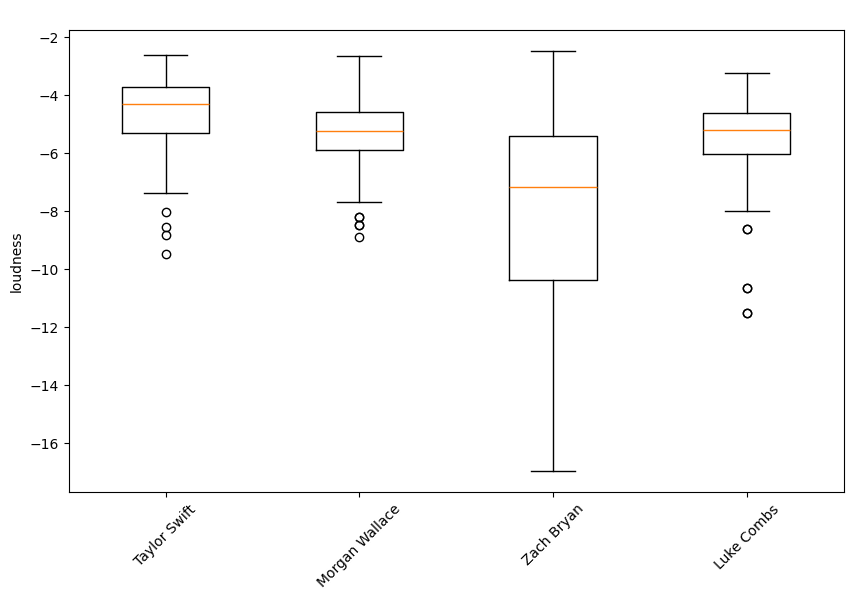

loudness comparison between Taylor Swift and Morgan Wallace: U=2021.5, p-value=0.008867750200317692
loudness comparison between Taylor Swift and Zach Bryan: U=2240.5, p-value=1.9671710621261993e-06
loudness comparison between Taylor Swift and Luke Combs: U=1857.5, p-value=0.002811284914138121


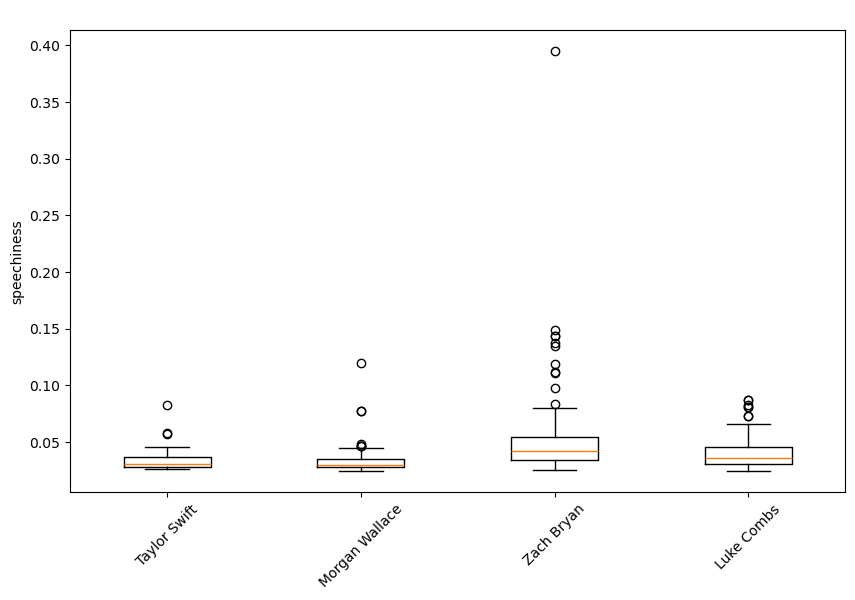

speechiness comparison between Taylor Swift and Morgan Wallace: U=1656.5, p-value=0.4905930470450254
speechiness comparison between Taylor Swift and Zach Bryan: U=644.5, p-value=1.5692071068635448e-05
speechiness comparison between Taylor Swift and Luke Combs: U=972.0, p-value=0.02610177028186468


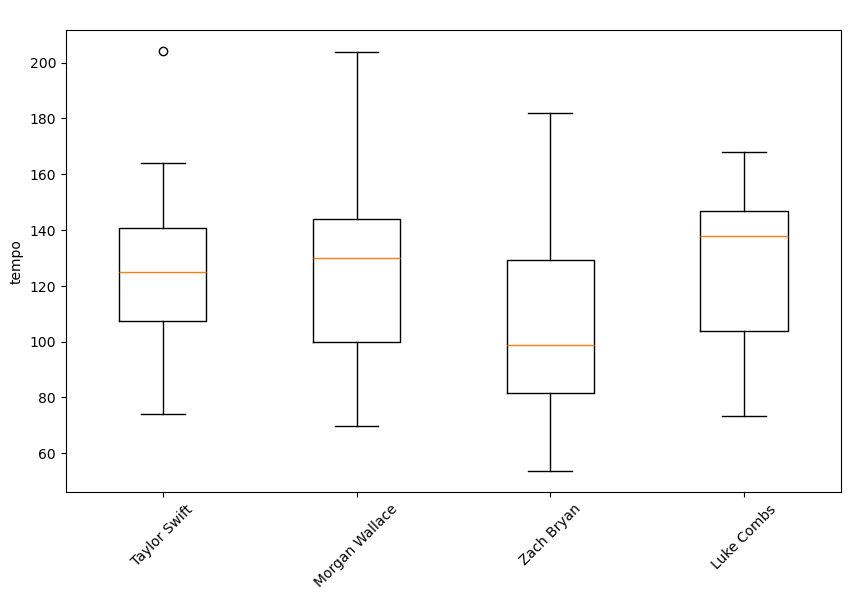

tempo comparison between Taylor Swift and Morgan Wallace: U=1484.0, p-value=0.8285585493705762
tempo comparison between Taylor Swift and Zach Bryan: U=1929.0, p-value=0.0028417611874177614
tempo comparison between Taylor Swift and Luke Combs: U=1269.0, p-value=0.6352388738597042


In [138]:
# List of features to compare
features_to_compare = ['popularity', 'acousticness', 'danceability', 'energy', 
                       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

compare_song_features_individual_artists(country, features_to_compare)

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'country' is your DataFrame and it's already loaded
numerical_columns = country.select_dtypes(include=['number']).columns

# Since 'loudness' is typically a negative value, you might want to normalize it for better comparison
country['loudness_norm'] = country['loudness'].apply(lambda x: x + 60)  # Example normalization

# Include 'artist' in the grouping, then select only numerical columns for aggregation
grouped_df = country.groupby(['artist'])[numerical_columns].mean().reset_index()

# Assuming 'score' is a column you want to include, ensure it's part of 'numerical_columns' or add it explicitly
columns_to_visualize = ['popularity', 'acousticness', 'danceability', 'energy', 
                        'instrumentalness', 'liveness', 'loudness_norm', 'speechiness', 'tempo', 'score']

# Filter the grouped_df for the columns to visualize
visual_df = grouped_df[['artist'] + columns_to_visualize].set_index('artist')


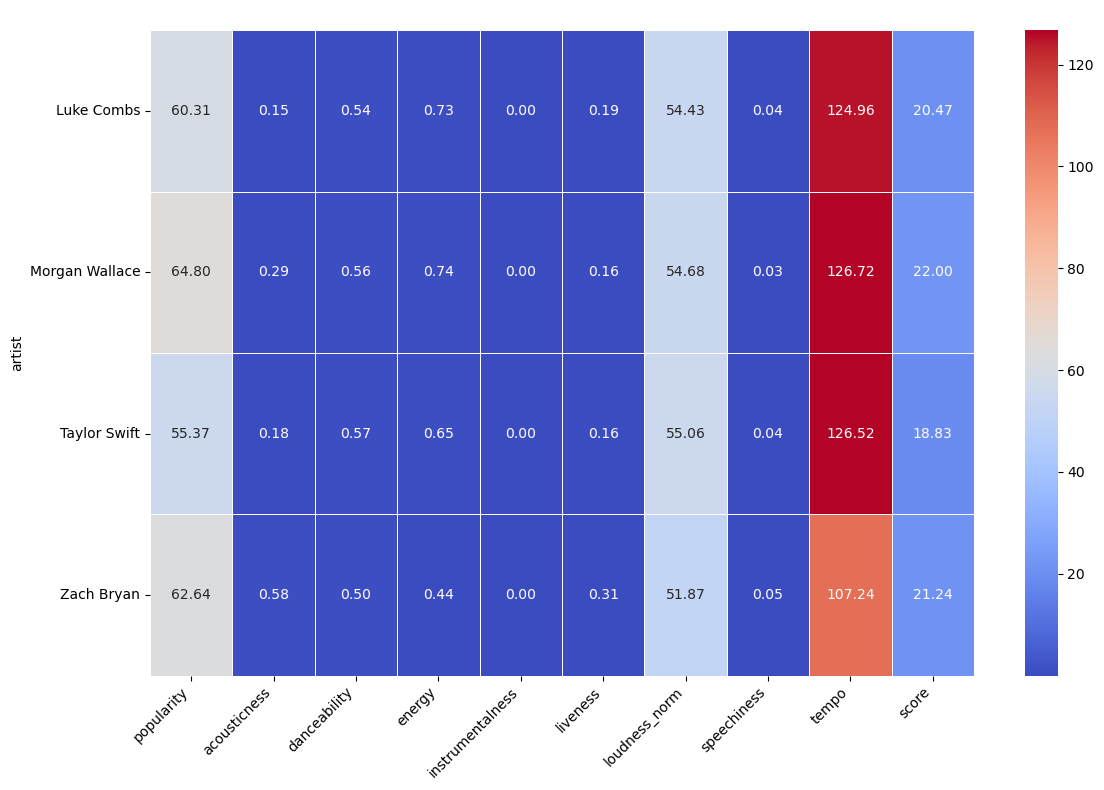

In [137]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(visual_df, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Adjust the plot as needed
plt.title('Feature Comparison Among Country Artists')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

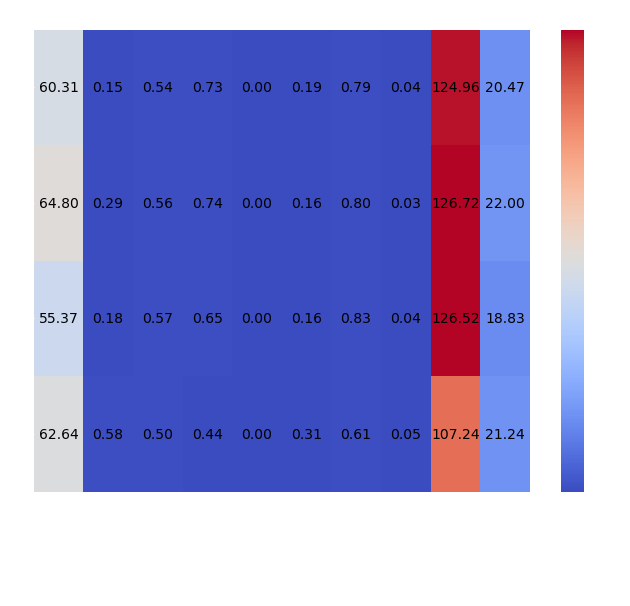

In [130]:
import seaborn as sns

# Set default text color to white
plt.rcParams['text.color'] = 'white'

# Creating the heatmap with a transparent background and black annotations
plt.figure(figsize=(8, 6), facecolor='none')  # Set facecolor to 'none' for transparency
ax = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"color":"black"})

plt.title('Album Features Heatmap', color='white')  # Ensure title is white
plt.xticks(rotation=45)

# Change the color of the axes labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Change tick colors for both axes
ax.tick_params(colors='white', which='both')  # 'both' changes both x and y axis ticks

# Adjust colorbar tick labels to white
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Save the figure with a transparent background
plt.savefig('heatmap_transparent_background.png', transparent=True, dpi=300)

plt.show()